In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


mpl.rcParams['figure.dpi']=400
%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
df=pd.read_csv("clean_default_credit.csv")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Dictionary
LIMIT_BAL: Amount of credit provided (in New Taiwanese (NT) dollar) including individual consumer credit and the family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).
AGE: Age (year).

PAY_1–PAY_6: A record of past payments. Past monthly payments, recorded
from April to September, are stored in these columns.
PAY_1 represents the repayment status in September; PAY_2 is the repayment
status in August; and so on up to PAY_6, which represents the repayment status
in April.
The measurement scale for the repayment status is as follows: -1 = pay duly; 1 =
payment delay for 1 month; 2 = payment delay for 2 months; and so on up to 8 =
payment delay for 8 months; 9 = payment delay for 9 months and above.

BILL_AMT1–BILL_AMT6: Bill statement amount (in NT dollar).
BILL_AMT1 represents the bill statement amount in September; BILL_AMT2
represents the bill statement amount in August; and so on up to BILL_AMT6,
which represents the bill statement amount in April.
PAY_AMT1–PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1
represents the amount paid in September; PAY_AMT2 represents the amount
paid in August; and so on up to PAY_AMT6, which represents the amount paid
in April.

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

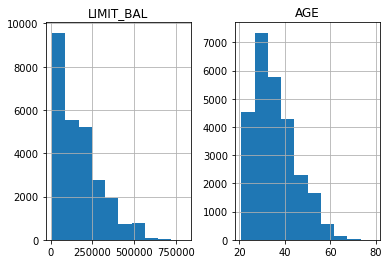

In [3]:
df[["LIMIT_BAL", "AGE"]].hist()

In [4]:
df[["LIMIT_BAL", "AGE"]].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


## check the Education columns value. 
Data dictionary describes only Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

In [5]:
df["EDUCATION"].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [6]:
# We can see that 0, 5 and 6 are the undocumented education here so we will lump them with 4 i.e. others
df.EDUCATION.replace(to_replace=[0,5,6],
                    value=4,
                    inplace=True)
df.EDUCATION.value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

## Check the Marriage columns value
Data dictionary describes that 1 = married, 2 = single and 3 = others.

In [7]:
df.MARRIAGE.value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [8]:
# It seems that there are value of 0 in the marriage columns which are undocumemted so we will lump it with 3
df.MARRIAGE.replace(to_replace=0,
                   value=3,
                   inplace=True)
df.MARRIAGE.value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

## Ordinal Features
Ordinal values features are the mapping between the levels of categorical features 
with numerical values like 1,2,3 with order

Text(0, 0.5, 'Default Rate')

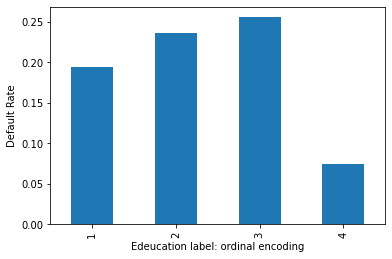

In [9]:
# Plotting the default rate vs education 
df.groupby("EDUCATION").agg({'default payment next month': 'mean'})\
                        .plot.bar(legend=False)
plt.xlabel("Edeucation label: ordinal encoding")
plt.ylabel("Default Rate")

The ordinal eduvation feature has the non linear effect to the output feature hence it will be better to use complex alogrithms like random forest, decision tree. If we want to use simpler and more intrepratble linear model like logistic regression we can use one hot encoding technique.

In [10]:
# Mapping the ordinal faeture of the Education with string values
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

df_oh = df.copy()

In [11]:
df_oh["EDUCATION"] = df_oh.EDUCATION.map(cat_mapping)
df_oh.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,ceae2946-47e4,50000,1,graduate school,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,d3b8ce26-9c89,500000,1,graduate school,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,d6e1911b-54d0,100000,2,university,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,8421d3b3-2b54,140000,2,high school,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,62a2fd79-cd90,20000,1,high school,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [12]:
# Creating one hot encoding for education
edu_ohe = pd.get_dummies(df_oh.EDUCATION, drop_first=True)
edu_ohe.head()

,high school,others,university
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [13]:
# concationating the one hot encoded education with the dataframe
df_ohe = pd.concat([df_oh, edu_ohe], axis=1, join='inner')
df_ohe.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,high school,others,university
0,798fc410-45c1,20000,2,university,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1
1,8a8c8f3b-8eb4,120000,2,university,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1
2,85698822-43f5,90000,2,university,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1
3,0737c11b-be42,50000,2,university,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1
4,3b7f77cc-dbc0,50000,1,university,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1
5,ceae2946-47e4,50000,1,graduate school,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,0,0
6,d3b8ce26-9c89,500000,1,graduate school,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0,0,0
7,d6e1911b-54d0,100000,2,university,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0,0,1
8,8421d3b3-2b54,140000,2,high school,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,1,0,0
9,62a2fd79-cd90,20000,1,high school,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,1,0,0


In [14]:
# drop the education from the df_ohe
df_ohe.drop(columns="EDUCATION", inplace=True, axis=0)
df_ohe.head(10)

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,high school,others,university
0,798fc410-45c1,20000,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1
2,85698822-43f5,90000,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1
3,0737c11b-be42,50000,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1
4,3b7f77cc-dbc0,50000,1,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1
5,ceae2946-47e4,50000,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0,0,0
6,d3b8ce26-9c89,500000,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0,0,0
7,d6e1911b-54d0,100000,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0,0,1
8,8421d3b3-2b54,140000,2,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,1,0,0
9,62a2fd79-cd90,20000,1,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,1,0,0


<AxesSubplot:xlabel='MARRIAGE'>

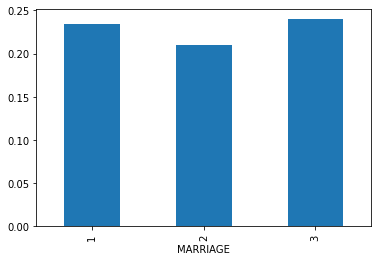

In [15]:
# plotting default rate vs marriage
df_ohe.groupby("MARRIAGE").agg({"default payment next month":"mean"})\
        .plot.bar(legend=False)

In [16]:
# We will leave marriage columns as ordinal values only as it seems to have a horizontal relationship

## Exploring the FINANCIAL History features
In data dictionary -2 = not used, -1 = payed full, 0=minimun payment, 1,2,3,4,5... means 1 month, 2 month and so on defer

In [17]:
pay_feautres = [feature for feature in df_ohe.columns if feature.lower().startswith("pay") and len(feature)<=6]
pay_feautres

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [43]:
df_ohe[pay_feautres].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [41]:
# since the values of pay feature lies from -2 to 8
pay_bins = np.array(range(-2, 10))-0.5
pay_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>],
       [<AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>],
       [<AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

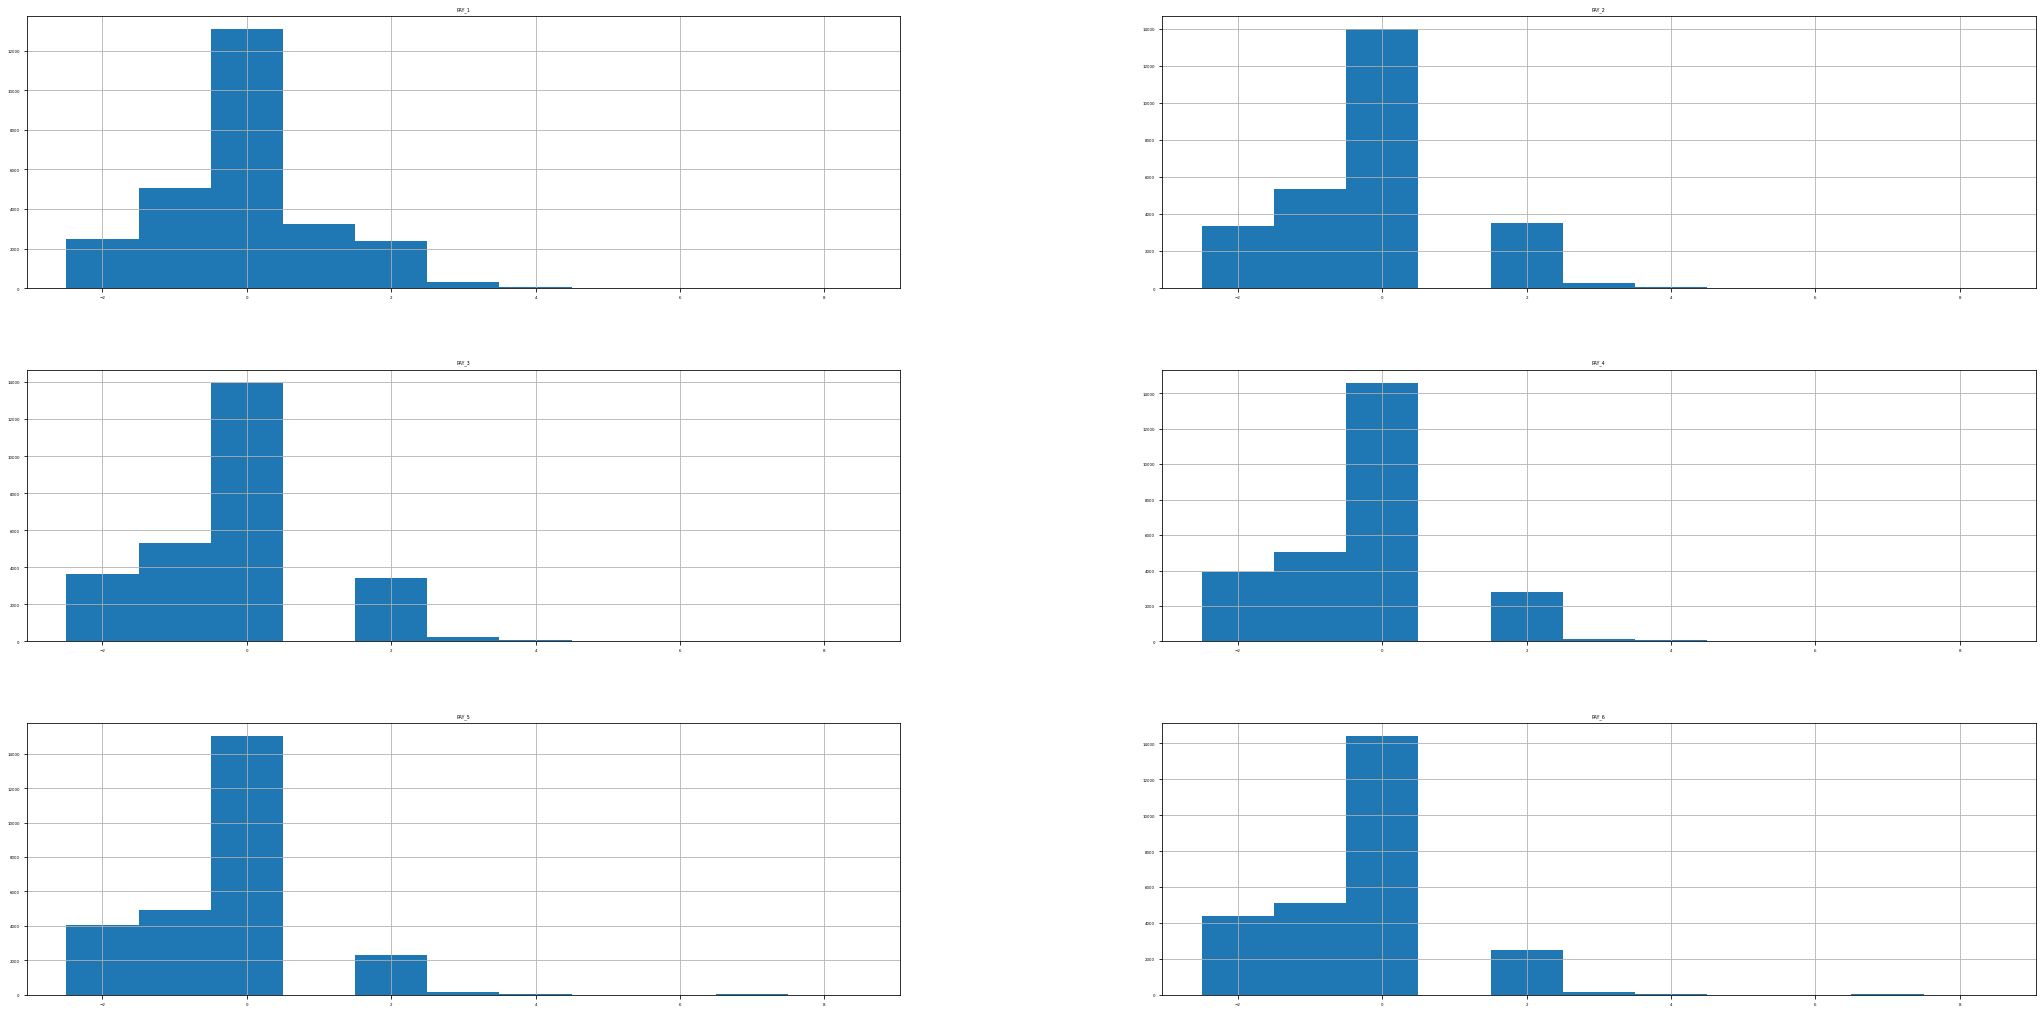

In [42]:
plt.rcParams["figure.figsize"] = (36, 18)
df_ohe[pay_feautres].hist(bins=pay_bins, layout=(3,2))


In [31]:
bill_features = [feature for feature in df_ohe.columns if feature.lower().startswith("bill")]
bill_features

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [ ]:
pay_amt_features = [feature for feature in df_ohe.columns if feature.lower().startswith("pay") and len(feature)>5]
pay_amt_features

In [44]:
df_ohe[pay_amt_features].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [33]:
df_ohe[bill_features].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>],
       [<AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

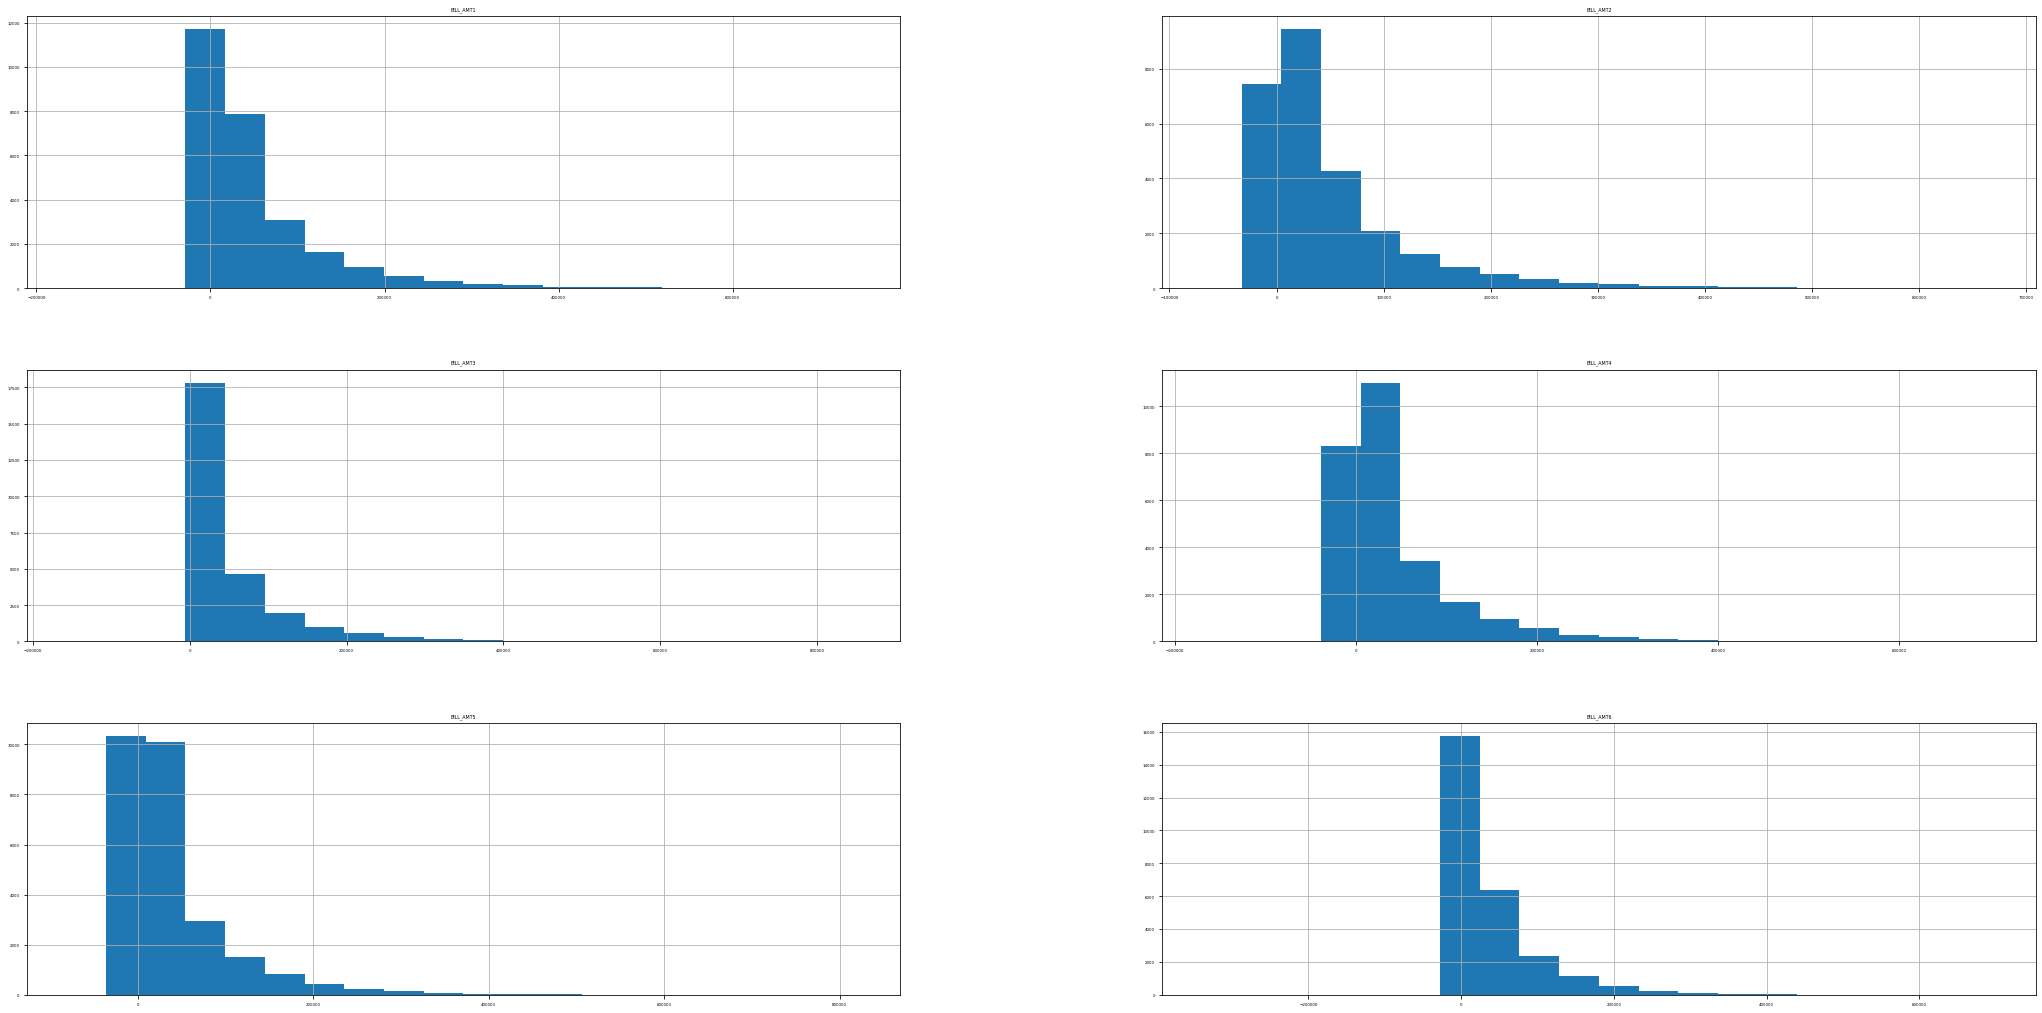

In [37]:
df_ohe[bill_features].hist(bins=20, layout=(3,2))

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

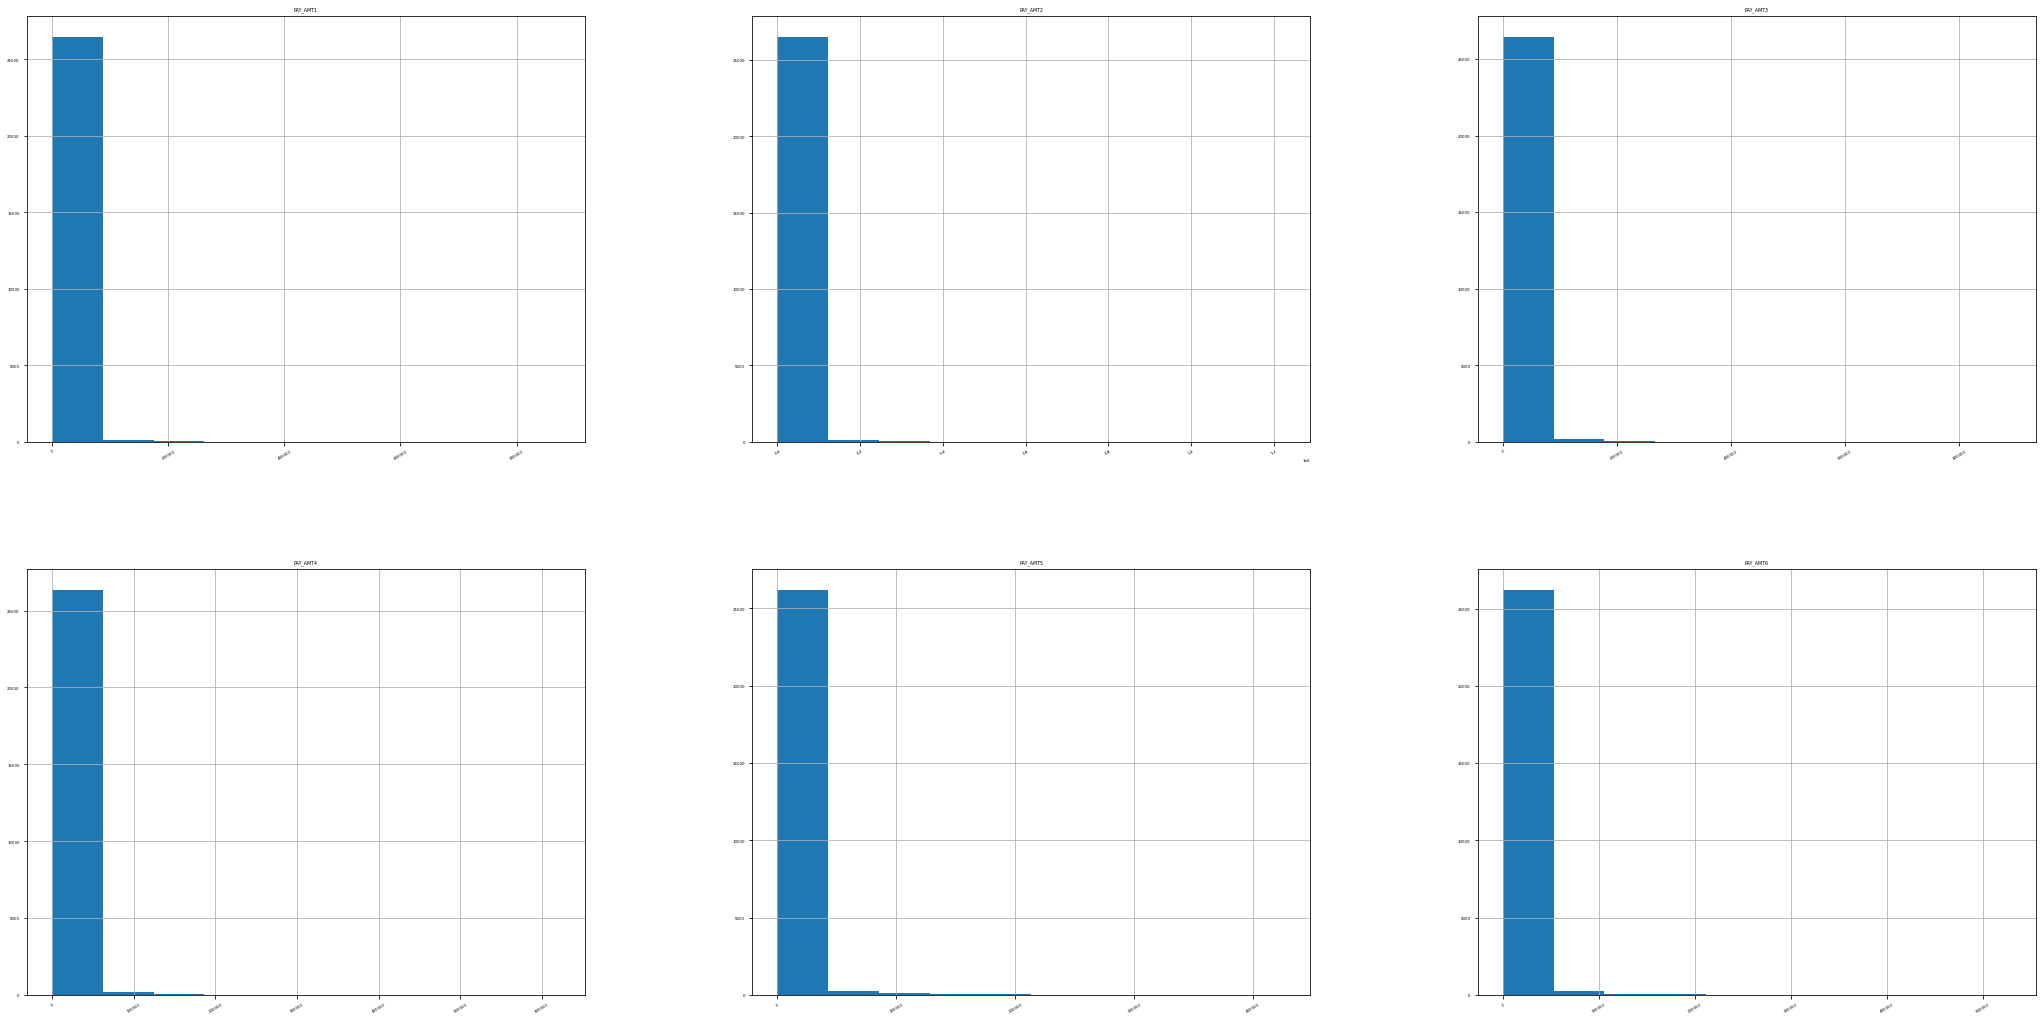

In [38]:
df_ohe[pay_amt_features].hist(layout=(2,3), xrot=30)

In [39]:
pay_zero_mask = df[pay_amt_features]==0

pay_zero_mask.head(5)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [45]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>],
       [<AxesSubplot:title={'center':'PAY_AMT3'}>,
        <AxesSubplot:title={'center':'PAY_AMT4'}>],
       [<AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

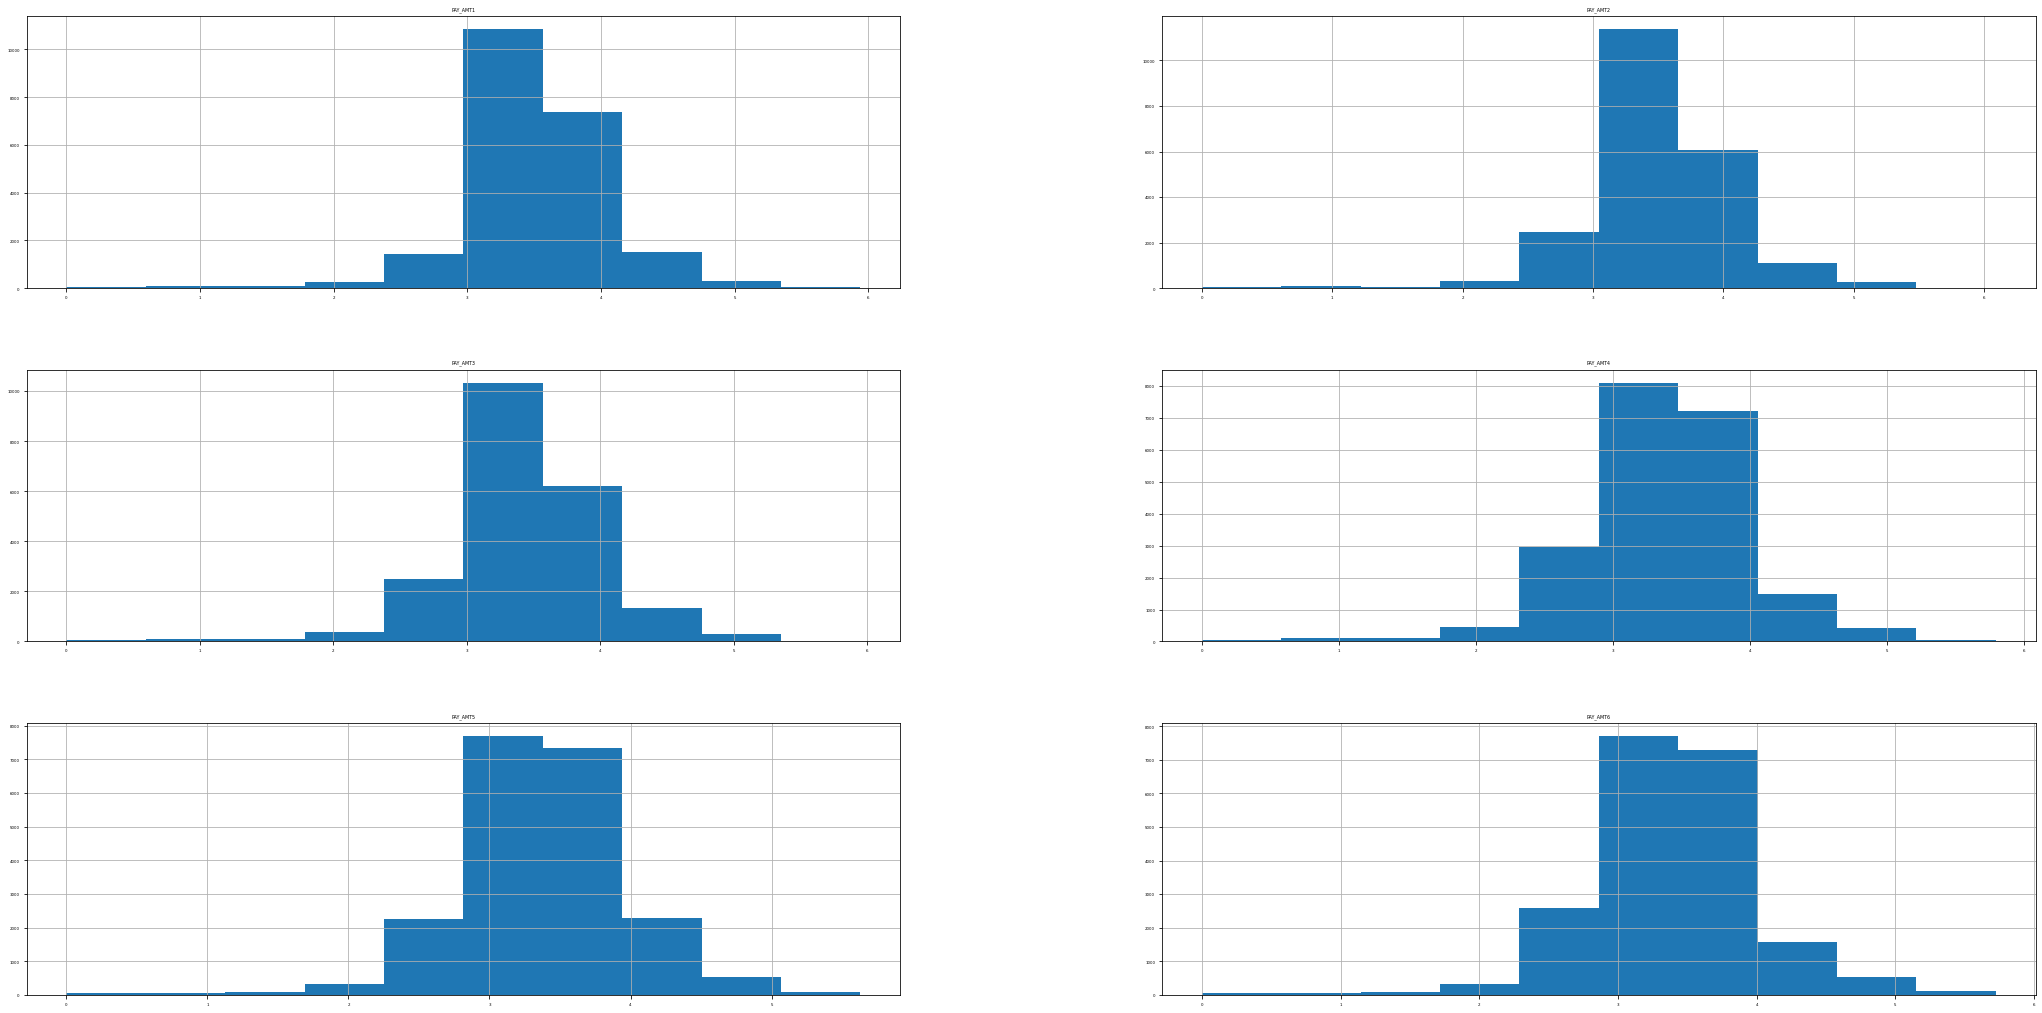

In [47]:
df_ohe[pay_amt_features][~pay_zero_mask].apply(np.log10).hist(layout=(3,2))

In [52]:
df_ohe.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


We can see that pay_2 refers to payment installment pending in the august and pay_3 refers to the payment installment pending in the June. 
The payment installment in august must be greater than June less than June or eual to June. It doesn't make sense that the credit was unsed in June and had two installment pending in July. 
It must have a linear increment if defaulted so there are some anomaloities in data.

These anamolies had to be fixed before preparing the model as capturing this kind of relationship in our model will impact 
its performance.

In [56]:
df_ohe.groupby("default payment next month")['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [58]:
df_ohe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'high school', 'others', 'university'],
      dtype='object')

In [59]:
columns_to_drop = ["ID", "SEX", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

In [62]:
final_feature_cols = [col for col in df_ohe.columns if col not in columns_to_drop]

In [63]:
final_feature_cols

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'high school',
 'others',
 'university']

In [67]:
df_final = df_ohe[final_feature_cols]

In [69]:
df_final.to_csv("final_default_credit.csv", index=False)